# LIBRERIAS A UTILIZAR

In [1]:
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# IMPORTAR DATASET

In [34]:
df_all_mesos = pd.read_csv("../DATASETS/new_df_mesos.csv", index_col="month_year", parse_dates=True)
df_all_mesos = df_all_mesos.dropna(subset=['Agressions'])
df_all_mesos

,Agressions,New Years,agressions_2_month_avg,agressions_6_month_avg,agressions_lag_1,agressions_lag_2,agressions_lag_3,agressions_lag_4,month,primavera,...,"cos(1,freq=M)","sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","cos(3,freq=W-SUN)","sin(4,freq=W-SUN)",Poverty,Unemployment,Bachelor_or_higher
month_year,,,,,,,,,,,,,,,,,,,,,
2000-01-01,78.0,1,41.5,19.166667,5.0,4.0,5.0,11.0,1,0,...,1.0,-0.974928,-0.222521,0.433884,-0.900969,0.623490,-0.781831,0.212,0.096,0.274
2000-02-01,8.0,0,43.0,18.500000,78.0,5.0,4.0,5.0,2,0,...,1.0,0.781831,0.623490,0.974928,-0.222521,-0.900969,-0.433884,0.212,0.096,0.274
2000-03-01,4.0,0,6.0,17.333333,8.0,78.0,5.0,4.0,3,1,...,1.0,0.974928,-0.222521,-0.433884,-0.900969,0.623490,0.781831,0.212,0.096,0.274
2000-04-01,5.0,0,4.5,17.333333,4.0,8.0,78.0,5.0,4,1,...,1.0,-0.974928,-0.222521,0.433884,-0.900969,0.623490,-0.781831,0.212,0.096,0.274
2000-05-01,4.0,0,4.5,17.333333,5.0,4.0,8.0,78.0,5,1,...,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.212,0.096,0.274
2000-06-01,17.0,0,10.5,19.333333,4.0,5.0,4.0,8.0,6,0,...,1.0,0.433884,-0.900969,-0.781831,0.623490,-0.222521,-0.974928,0.212,0.096,0.274
2000-07-01,11.0,0,14.0,8.166667,17.0,4.0,5.0,4.0,7,0,...,1.0,-0.974928,-0.222521,0.433884,-0.900969,0.623490,-0.781831,0.212,0.096,0.274
2000-08-01,13.0,0,12.0,9.000000,11.0,17.0,4.0,5.0,8,0,...,1.0,0.781831,0.623490,0.974928,-0.222521,-0.900969,-0.433884,0.212,0.096,0.274
2000-09-01,21.0,0,17.0,11.833333,13.0,11.0,17.0,4.0,9,0,...,1.0,-0.433884,-0.900969,0.781831,0.623490,-0.222521,0.974928,0.212,0.096,0.274


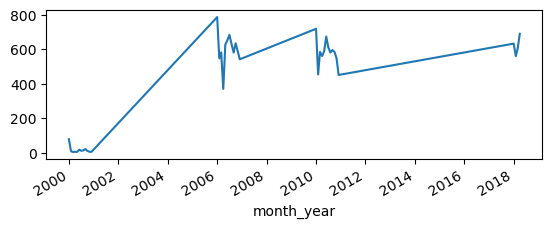

In [35]:
df_all_mesos["Agressions"].plot(subplots=True, layout=(2,1));

# DIVIDIR TRAIN Y TEST

In [36]:
train_data, test_data = df_all_mesos[:'2019-10'], df_all_mesos.loc['2010-01-01':'2017-01-01']
train_arima = train_data['Agressions']
test_arima = test_data['Agressions']

# ENTRENAR MODELO

In [37]:
history = [x for x in train_arima]
y = test_arima
y = y[y.notna()]
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -250.191
Date:                Mon, 29 Jan 2024   AIC                            504.383
Time:                        19:18:13   BIC                            507.710
Sample:                             0   HQIC                           505.576
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3724      0.282     -1.319      0.187      -0.926       0.181
sigma2      2.178e+04   1580.919     13.778      0.000    1.87e+04    2.49e+04
Ljung-Box (L1) (Q):                   0.07   Jarque-

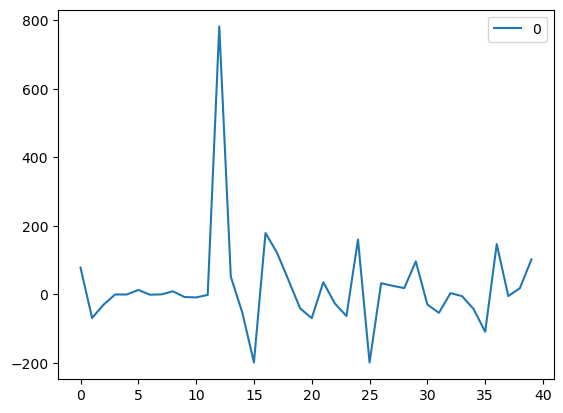

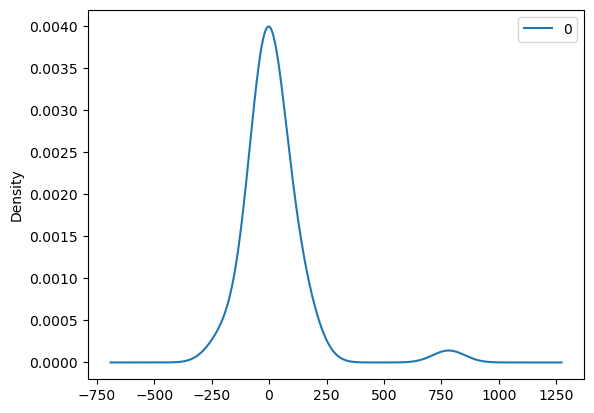

                0
count   40.000000
mean    22.173980
std    146.449831
min   -199.089227
25%    -32.913882
50%     -0.558566
75%     36.613211
max    782.000000


In [38]:
print(model_fit.summary()) #resumen del entrenamiento del modelo
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde') 
pyplot.show()
print(residuals.describe()) # resumen de stats de residuales 

In [39]:
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

/var/folders/1d/_xylp1812vd2jg38vsf_30w00000gn/T/ipykernel_950/151777919.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0])


In [40]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

/var/folders/1d/_xylp1812vd2jg38vsf_30w00000gn/T/ipykernel_950/1295931633.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]


In [41]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 8119.547053681536
MAE: 61.05250552485713
RMSE: 90.10852930595159


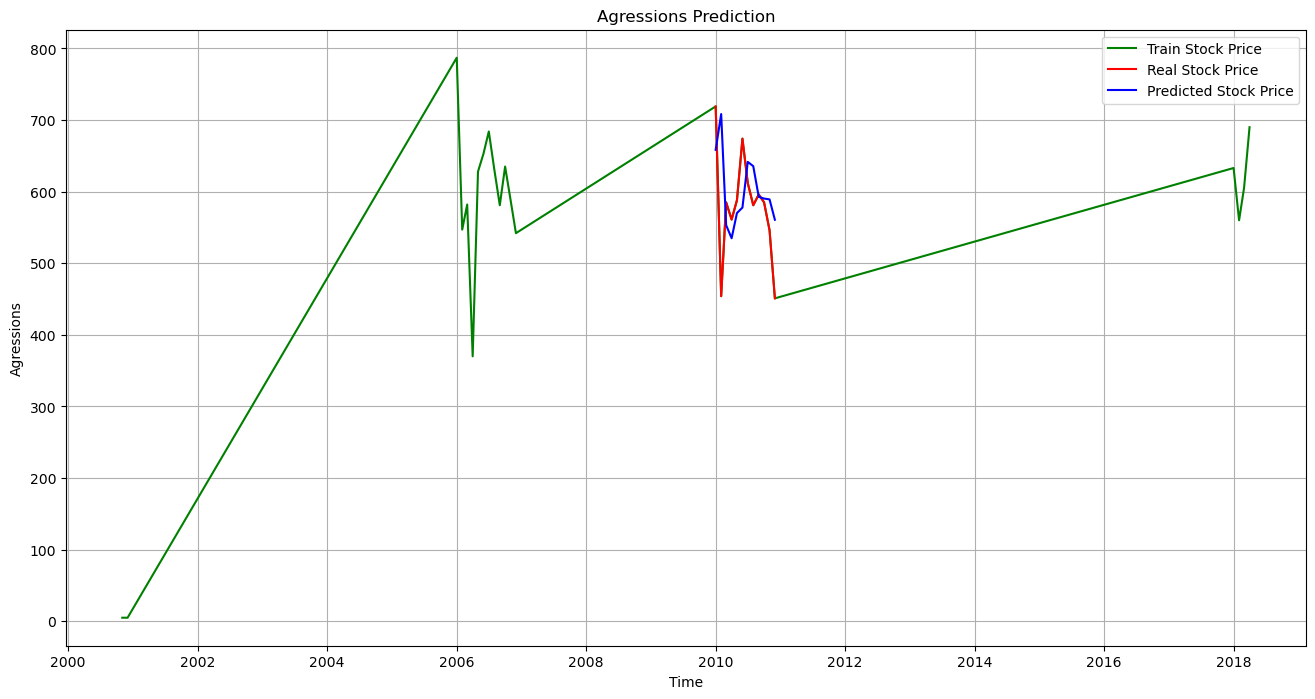

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df_all_mesos.index[-30:], df_all_mesos['Agressions'].tail(30), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Agressions Prediction')
plt.xlabel('Time')
plt.ylabel('Agressions')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
df_pred_ano = pd.concat([y, pd.Series(predictions, index=y.index[-len(predictions):], name='Predictions')], axis=1)
df_pred_ano

,Agressions,Predictions
month_year,,
2010-01-01,719.0,658.347934
2010-02-01,454.0,708.342544
2010-03-01,585.0,553.195200
2010-04-01,561.0,534.927758
2010-05-01,588.0,570.103874
2010-06-01,674.0,577.742778
2010-07-01,612.0,641.522112
2010-08-01,581.0,635.565497
2010-09-01,596.0,592.693260


In [48]:
pred_models = pd.read_csv("../DATASETS/pred_models_ano_2010.csv", index_col="month_year", parse_dates=True)
pred_models

,Agressions,XGBoost
month_year,,
2010-01-01,719.0,699.24634
2010-02-01,454.0,560.00183
2010-03-01,585.0,566.13650
2010-04-01,561.0,392.50024
2010-05-01,588.0,560.97090
2010-06-01,674.0,580.97430
2010-07-01,612.0,616.25995
2010-08-01,581.0,563.78864
2010-09-01,596.0,536.88420


In [49]:
pred_models_2010 = pred_models.merge(df_pred_ano[['Predictions']], left_index=True, right_index=True, how='left')
pred_models_2010 = pred_models_2010.rename(columns={'Predictions':'ARIMA'})

In [50]:
pred_models_2010

,Agressions,XGBoost,ARIMA
month_year,,,
2010-01-01,719.0,699.24634,658.347934
2010-02-01,454.0,560.00183,708.342544
2010-03-01,585.0,566.13650,553.195200
2010-04-01,561.0,392.50024,534.927758
2010-05-01,588.0,560.97090,570.103874
2010-06-01,674.0,580.97430,577.742778
2010-07-01,612.0,616.25995,641.522112
2010-08-01,581.0,563.78864,635.565497
2010-09-01,596.0,536.88420,592.693260


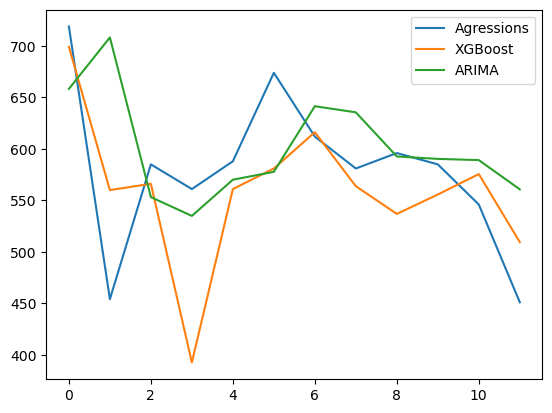

In [52]:
pred_models_2010 = pred_models_2010.reset_index()
pred_models_2010.plot(y=["Agressions","XGBoost","ARIMA"])
plt.show()